This notebook and code simulates the motion of a falling object.  Using constant-acceleration kinematics equations to model the motion of the falling projectile. 

Nathan Moore, Winona State University

Feb 2017

A reminder, in jupyter, shift+enter evaluates a cell.  Many commands are silent (no output is produced).  

In [52]:
# this tells jupyter to make math functions available
from math import *

In [53]:
# simulation parameters
t=0.0
dt=0.1
t_limit=10

g=9.8
m=1

x1=10
v1=0
f1=-m*g
a1=f1/m

In [54]:
# As the simulation progresses, we'll use arrays/lists to store trajectory values
t_vals=[]
x_vals=[]
v_vals=[]
# store the initial values
x_vals.append(x1)
v_vals.append(v1)
t_vals.append(t)

# A "good" numerical model will conserve system energy.  The following lists will keep track
# of the different kinds of energy to projectile has.
ke_vals=[]  
pe_vals=[]
e_vals=[]
# compute system energy
KE = 0.5*m*v1*v1
PE_G = m*g*x1
# store the initial energy values
ke_vals.append(KE)
pe_vals.append(PE_G)
e_vals.append(KE+PE_G)

In [55]:
# As the simulation progresses, it will print out the system's state.
# here's a descriptive header for that data
print("t\tx1\tv1\ta1")
# print out the initial state of the system
print('{0:5.2f}\t{1:5.2f}\t{2:5.2f}\t{3:5.2f}\t'.format(t, x1, v1, a1))

#the main body of the simulation follows.  

# everything inside (tabbed in after) the while loop is executed over and over 
# until the conditions inside the while loop are false.  So, the loop will run
# until either the time exceeds the time limit, or the projectile reaches (below) the ground
while(t<t_limit and x1>0.0):
   
    # compute the net force and acceleration of the system
    f1=-(m*g)
    a1=f1/m
    
    # using the computed acceleration, update the position
    x2 = x1 + v1*dt + 0.5*a1*dt*dt
    v2 = v1 + a1*dt
    
    # this can be commented out - print a running summary of the simulation
    # "tab" is "\t" and the "5.2f" format is of 
    # float (f) numbers of 5 places, 2 numbers after the decimal point
    print('{0:5.2f}\t{1:5.2f}\t{2:5.2f}\t{3:5.2f}\t'.format(t, x1, v1, a1))

    # compute the energy
    KE = 0.5*m*v2*v2
    PE_G = m*g*x2
    # and then store the new values
    x_vals.append(x2)
    v_vals.append(v2)
    t_vals.append(t+dt) # note, time corresponds to updated state, eg x2, not x1
    ke_vals.append(KE)
    pe_vals.append(PE_G)
    e_vals.append(KE+PE_G)

    # before restarting the loop, update the positions (new -> old) and tick the clock 
    x1=x2
    v1=v2
    t=t+dt
# a tab in finishes the loop. Spreading a loop across two cells is bad practice and probably won't work anyway.   
# print out the final state
print('{0:5.2f}\t{1:5.2f}\t{2:5.2f}\t{3:5.2f}\t'.format(t, x1, v1, a1))

t	x1	v1	a1
 0.00	10.00	 0.00	-9.80	
 0.00	10.00	 0.00	-9.80	
 0.10	 9.95	-0.98	-9.80	
 0.20	 9.80	-1.96	-9.80	
 0.30	 9.56	-2.94	-9.80	
 0.40	 9.22	-3.92	-9.80	
 0.50	 8.78	-4.90	-9.80	
 0.60	 8.24	-5.88	-9.80	
 0.70	 7.60	-6.86	-9.80	
 0.80	 6.86	-7.84	-9.80	
 0.90	 6.03	-8.82	-9.80	
 1.00	 5.10	-9.80	-9.80	
 1.10	 4.07	-10.78	-9.80	
 1.20	 2.94	-11.76	-9.80	
 1.30	 1.72	-12.74	-9.80	
 1.40	 0.40	-13.72	-9.80	
 1.50	-1.03	-14.70	-9.80	


After the simulation has finished, we need to look at the results.  Graphing is the most common way to visualize lists of numbers.  In Jupyter/python, a common math library is matplotlib http://matplotlib.org/, which is, more or less, equivalent to the plotting language and routines in Matlab, a commercial programming system.  

The most common plot to make is an x-y graph of points or dots.  Several examples follow.

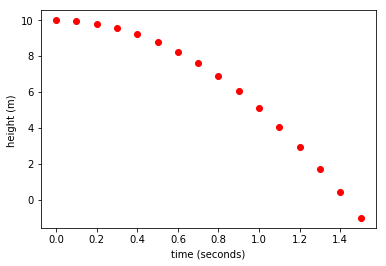

In [58]:
# again, make the plotting library available
import matplotlib.pyplot as plt

# first, an x-y graph of data points.  Note that we're feeding the function
# two arrays of equal length
plt.plot(t_vals, x_vals,"ro")
# then, a few more commands to label the graph axes
plt.xlabel('time (seconds)')
plt.ylabel('height (m) ')
# finally, render the graph to screen 
plt.show()

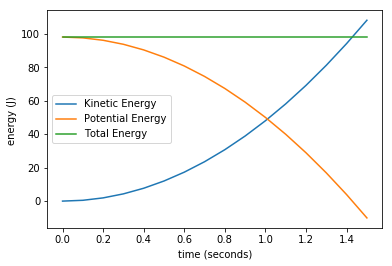

In [61]:
# Remember that system energy was the check of our simulation's accuracy.
# Specifically, an accurate system will conserve (hold constant) the total system energy
plt.plot(t_vals,ke_vals,label="Kinetic Energy")
# since there are several data series in this plot, each series has a "label" tag
plt.plot(t_vals,pe_vals,label="Potential Energy")
plt.plot(t_vals,e_vals,label="Total Energy")
plt.xlabel('time (seconds)')
plt.ylabel('energy (J) ')
# note that the "label" tags above are used in the plot legend
plt.legend()
plt.show()

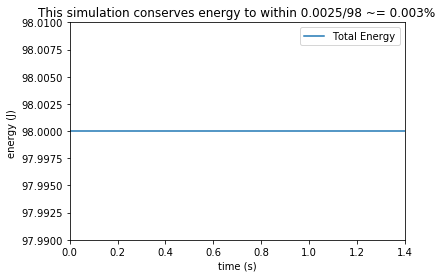

In [64]:
# it looks like the system enery is conserved.  This plot zooms in on the line to check.
plt.plot(t_vals,e_vals,label="Total Energy")
plt.xlabel('time (s)')
plt.ylabel('energy (J) ')
plt.legend()
plt.title('This simulation conserves energy to within 0.0025/98 ~= 0.003%')
plt.axis([0, 1.4, 97.99, 98.01])
plt.show()

Normally, your goal in science is to take accurate data and then explain/describe the data with a line/equation.  The simplest way to put a line through data is via trial and error.  Ie, if you think the line $y=mx+b$ describes the data, pick a slope $m$, and y-intercept, $b$, and then after plotting the line, adjust $m$ and $b$ and replot until the line describes the data.  

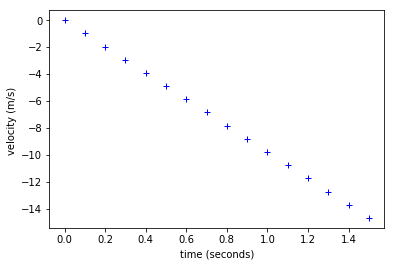

In [72]:
# So, lets plot the velocity data so that we can guess at the fit 
plt.plot(t_vals,v_vals,"b+") # note, "b+" makes blue "+" plot markers
plt.xlabel('time (seconds)')
plt.ylabel('velocity (m/s) ')
plt.show()

In [74]:
# Looking at the graph above, it seems like the slope is about -10 and the y-intercept is 0.2
m = -10.0
b = 0.2
# in matplotlib, a "line" is a list of (x,y) data points that are connected by a piecewise continuous line.
# For example, think about the energy plot above.  They "lines" there are actually from a discrete set of 
# values that we calculated.  
# 
# So, given our estimates above, we'll create a new array of "theory" values.
v_theory=[]
# this is a for-each loop.  It is like a while loop, but each time it runs, "t" takes a new value from the "tvals"
# list.  Values are taken in order, starting from the front of the list.  When the list has been fully sampled (used up)
# the loop terminates.
for t in t_vals:
    v_temp = m*t + b
    v_theory.append(v_temp)
    # note, it would be equivalent, but less convienient, to say
    # v_theory.append(-10*t+0.2)
#print(v_theory)

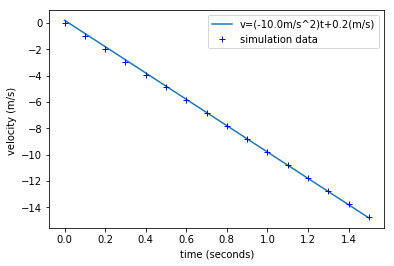

In [77]:
# now, plot theory and "data" 
plt.plot(t_vals,v_theory,label="v=(-10.0m/s^2)t+0.2(m/s)")
plt.plot(t_vals, v_vals,"b+",label="simulation data")
plt.xlabel('time (seconds)')
plt.ylabel('velocity (m/s) ')
plt.legend()
plt.show()

In [79]:
# This fit is ok, but maybe the fit variables are slightly off.  Let's try again.
m = -9.6
b = -0.2
v_theory_2=[]
for t in t_vals:
    v_temp = m*t + b
    v_theory_2.append(v_temp)

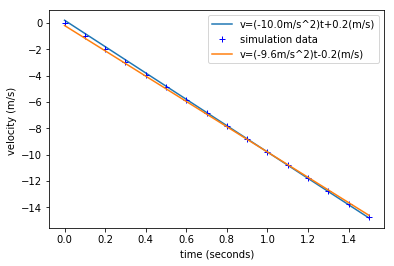

In [80]:
# now, plot theory 1, theory 2, and "data" 
plt.plot(t_vals,v_theory,label="v=(-10.0m/s^2)t+0.2(m/s)")
plt.plot(t_vals, v_vals,"b+",label="simulation data")
plt.plot(t_vals,v_theory_2,label="v=(-9.6m/s^2)t-0.2(m/s)")
plt.xlabel('time (seconds)')
plt.ylabel('velocity (m/s) ')
plt.legend()
plt.show()

So, based on these two fits, I think the equation that describes out simulation data could reasonably be: 
    $v=(-9.8\pm 0.2) m/s^2 ~ t + (0 \pm 0.2)m/s $.  
There are certainly more sophisticated ways to fit a line to data, but this works.  I used a technique similar to this in figure 2 of https://arxiv.org/abs/cond-mat/0403419.